# Linear Regression

<!-- ![Linear regression image](https://production-media.paperswithcode.com/methods/2560px-Linear_regression.svg_wwqz1f3.png) -->

![Linear Regression](data/linear_regression.png)
![ML System](data/ML_System.png)


https://github.com/42-AI/bootcamp_machine-learning

In [3]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random

# %matplotlib notebook
# %matplotlib widget
%matplotlib inline


MIN_VALUE = 0
MAX_VALUE = 1
NB_ELEMENTS = 100

x = np.linspace(MIN_VALUE, MAX_VALUE, NB_ELEMENTS)
COEF_A_MIN = 0
COEF_A_MAX = 5

COEF_B_MIN = 0
COEF_B_MAX = 5

COEF_DELTA_A = (COEF_A_MAX) - (COEF_A_MIN)
COEF_DELTA_B = (COEF_B_MAX) - (COEF_B_MIN)

COEF_A = (random.random() * (COEF_DELTA_A - 1)) + COEF_A_MIN + .5
COEF_B = (random.random() * (COEF_DELTA_B - 1)) + COEF_B_MIN + .5
random_noise = np.random.random(NB_ELEMENTS) * MAX_VALUE * 2
random_noise -= random_noise.mean()
# y = (a * x) + b
# plt.scatter(x, y)
y = (COEF_A * x) + COEF_B + random_noise

print(f"{x.shape = }")
print(f"{y.shape = }")
print(f"{COEF_A = }")
print(f"{COEF_B = }")

x.shape = (100,)
y.shape = (100,)
COEF_A = 4.007013757802705
COEF_B = 2.1264576118312264


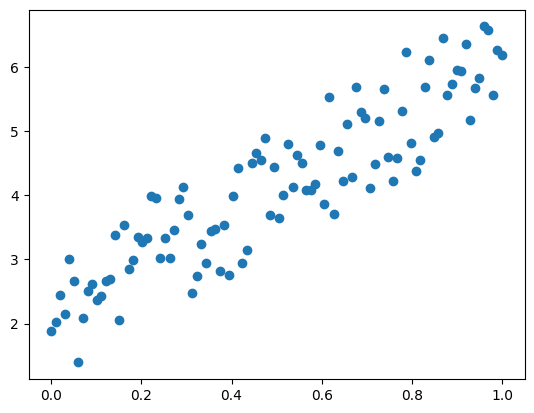

In [4]:
plt.scatter(x, y)

# Data

$m$ is the number of examples

$n$ is the number of dimensions / features

# X can have multiple features

$$
X^{(m)}_n
$$

# Y only has one dimension

$$
Y^{(m)}
$$

# Predict

A simple formula:
$$
\hat{y} = ax + b
$$

That we can genralize to multiple dimensions with Thetas:
$$
\hat{y} = θ_0 \cdot x + θ_1
$$

# Cost

For each prediction we will measure the difference between the prediction and the true value
$$
\text{Cost}^{(i)} = (\hat{y}^{(i)} - y^{(i)})
$$

And we will apply it to our complete dataset and keep the mean

$$
\text{Cost} = \frac{\sum_{i=0}^{m}{(\hat{y}^{(i)} - y^{(i)})}}{m}
$$

thetas = array([3.24172973, 4.40578425])
x.shape = (100,)
y.shape = (100,)
thetas = array([3.24172973, 4.40578425])
Linear regression: thetas = array([3.24172973, 4.40578425]) error = np.float64(391.43535646048707)


np.float64(391.43535646048707)

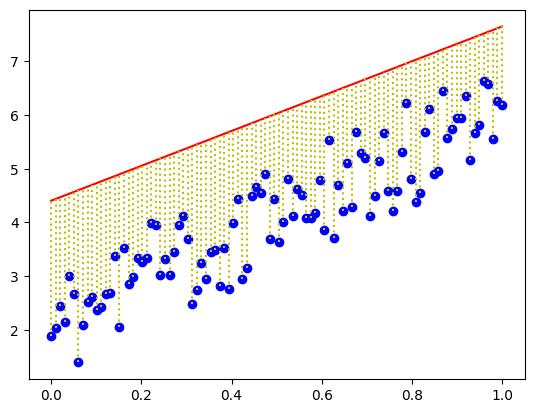

In [5]:
def predict(x, thetas):
    a, b = thetas
    y_hat = a * x + b
    return y_hat


def get_cost(y, y_hat):
    return ((y - y_hat) ** 2).sum()


def plot_linear_regression_2D(x, y, thetas, show_errors=False):
    print(f"{x.shape = }")
    print(f"{y.shape = }")
    print(f"{thetas = }")
    plt.scatter(x, y, c="b")
    y_hat = predict(x, thetas)
    error = get_cost(y, y_hat)
    plt.plot(x, y_hat, c="r")
    if show_errors:
        for x_element, y_element, y_hat_element in zip(x, y, y_hat):
            plt.plot((x_element, x_element), (y_element, y_hat_element), ":y")
    # ax_2d.title(f"Error = {error}")
    print(f"Linear regression: {thetas = } {error = }")
    return error


def plot_linear_regression_cost_2D(x, y, thetas):
    print(f"Plot lr + cost: {thetas = }")
    y_hat = predict(x, thetas)
    error = get_cost(y, y_hat)
    print(f"Plot lr + cost: {error = }")
    plt.scatter(thetas[0], error, c="y")
    plt.xlim(COEF_A_MIN, COEF_A_MAX)
    plt.ylim(0, 10_000)
    return error


a = (random.random() - COEF_A_MIN) * COEF_A_MAX
b = (random.random() - COEF_B_MIN) * COEF_B_MAX
thetas = np.array((a, b))
print(f"{thetas = }")
cost = plot_linear_regression_2D(x, y, thetas, show_errors=True)
cost

We can use our cost formula to get see how good our linear regression

x.shape = (100,)
y.shape = (100,)
thetas = array([3, 3])
Linear regression: thetas = array([3, 3]) error = np.float64(48.40469341359079)
cost = np.float64(48.40469341359079)


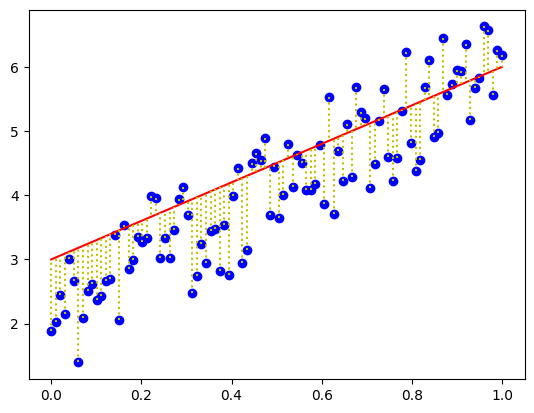

In [6]:
cost = plot_linear_regression_2D(x, y, np.array((3, 3)), show_errors=True)
print(f"{cost = }")

Plot lr + cost: thetas = array([3.24172973, 4.40578425])
Plot lr + cost: error = np.float64(391.43535646048707)


np.float64(391.43535646048707)

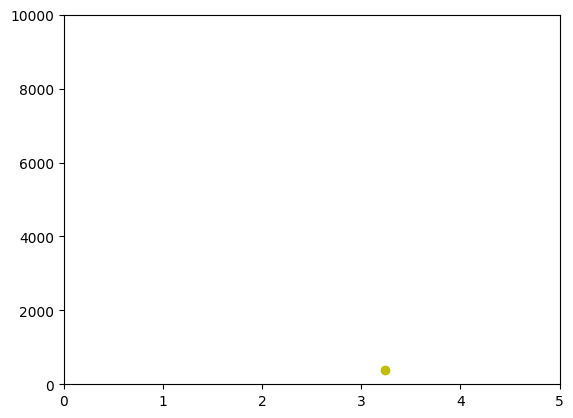

In [7]:
plot_linear_regression_cost_2D(x, y, thetas)

x.shape = (100,)
y.shape = (100,)
thetas = (4.007013757802705, 2.1264576118312264)
Linear regression: thetas = (4.007013757802705, 2.1264576118312264) error = np.float64(28.69145957713835)


np.float64(28.69145957713835)

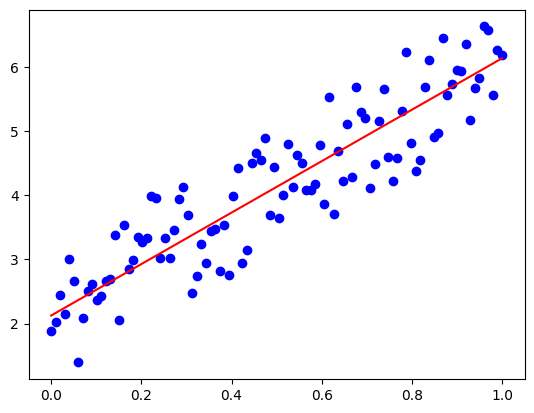

In [8]:
# cost = plot_linear_regression(x, y, (COEF_A, COEF_B), show_errors=True)
cost = plot_linear_regression_2D(x, y, (COEF_A, COEF_B), show_errors=False)
cost

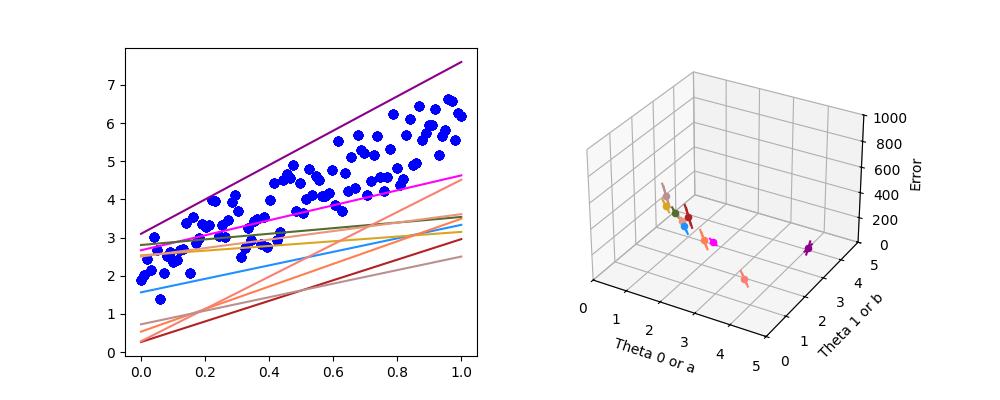

In [9]:
%matplotlib widget


fig = plt.figure(figsize=(10, 4))
# fig.suptitle("A tale of 2 subplots")
ax_2d = fig.add_subplot(1, 2, 1)
ax_3d = fig.add_subplot(1, 2, 2, projection="3d")
cmap = plt.get_cmap("winter")
MAX_ERROR = 300


def predict(x, thetas):
    a, b = thetas
    y_hat = a * x + b
    return y_hat


def get_cost(y, y_hat):
    return ((y - y_hat) ** 2).sum()


def plot_linear_regression_3D(x, y, thetas, show_errors=False, color=None):
    ax_2d.scatter(x, y, c="b")
    y_hat = predict(x, thetas)
    cost = get_cost(y, y_hat)
    ax_2d.plot(x, y_hat, c=cmap(cost / 300) if color is None else color)
    if show_errors:
        for x_element, y_element, y_hat_element in zip(x, y, y_hat):
            plt.plot(
                (x_element, x_element), 
                (y_element, y_hat_element), 
                ":y"
            )
    # ax_2d.title(f"Error = {error}")
    return cost

def plot_cost_3d(cost, thetas, x, y, color=None):
    ax_3d.scatter(
        thetas[0],
        thetas[1],
        zs=cost,
        c=cmap(cost / 300) if color is None else color,
        # zdir="z",
        # c=c_list,
        label=f"θ({thetas[0]:.2f}, {thetas[1]:.2f}) cost={int(cost)}",
    )
    epsilon = 1e-1
    thetas_a = thetas.copy() - epsilon
    thetas_b = thetas.copy() + epsilon
    y_hat_a = predict(x, thetas_a)
    cost_a = get_cost(y, y_hat_a)
    y_hat_b = predict(x, thetas_b)
    cost_b = get_cost(y, y_hat_b)
    ax_3d.plot(
        (thetas_a[0], thetas_b[0]),
        (thetas[1], thetas[1]),
        (cost_a, cost_b),
        c=cmap(cost / 300) if color is None else color,
	)
    ax_3d.plot(
        (thetas[0], thetas[0]),
        (thetas_a[1], thetas_b[1]),
        (cost_a, cost_b),
        c=cmap(cost / 300) if color is None else color,
	)
    # ax_3d.legend()
    ax_3d.set_xlim(COEF_A_MIN, COEF_A_MAX)
    ax_3d.set_ylim(COEF_B_MIN, COEF_B_MAX)
    ax_3d.set_zlim(0, 1000)
    ax_3d.set_xlabel("Theta 0 or a")
    ax_3d.set_ylabel("Theta 1 or b")
    ax_3d.set_zlabel("Error")

import random
import matplotlib.colors as mcolors

def perceived_brightness(hex_color):
    # Convert hex to RGB
    rgb = mcolors.to_rgb(hex_color)
    # Calculate perceived brightness
    return (0.299 * rgb[0] + 0.587 * rgb[1] + 0.114 * rgb[2])

def random_named_color(min_brightness=0.2, max_brightness=0.8):
    colors = list(mcolors.CSS4_COLORS.items())
    while True:
        name, hex_color = random.choice(colors)
        brightness = perceived_brightness(hex_color)
        if min_brightness <= brightness <= max_brightness:
            return name

# Usage
color = random_named_color()

for _ in range(10):
    a = (random.random() - COEF_A_MIN) * COEF_A_MAX
    b = (random.random() - COEF_B_MIN) * COEF_B_MAX
    thetas = np.array((a, b))
    color = random_named_color()
    # color = None
    cost = plot_linear_regression_3D(x, y, thetas, color=color)
    plot_cost_3d(cost, thetas, x, y, color=color)

In [10]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import random

# Solve bug with: https://github.com/matplotlib/ipympl/issues/171
%matplotlib inline

# def plot_linear_regression_2D(x, y, thetas, show_errors=False):
#     # print(f"{x.shape = }")
#     # print(f"{y.shape = }")
#     plt.scatter(x, y, c="b")
#     y_hat = predict(x, thetas)
#     error = get_cost(y, y_hat)
#     plt.plot(x, y_hat, c="r")
#     if show_errors:
#         for x_element, y_element, y_hat_element in zip(x, y, y_hat):
#             plt.plot((x_element, x_element), (y_element, y_hat_element), ":y")
#     # ax_2d.title(f"Error = {error}")
#     print(f"Linear regression: {thetas = } {error = }")
#     return error


# def plot_linear_regression_cost_2D(x, y, thetas):
#     print(f"Plot lr + cost: {thetas = }")
#     y_hat = predict(x, thetas)
#     error = get_cost(y, y_hat)
#     print(f"Plot lr + cost: {error = }")
#     plt.scatter(thetas[0], error, c="y")
#     plt.xlim(COEF_A_MIN, COEF_A_MAX)
#     plt.ylim(0, 10_000)
#     return error


In [11]:

a = (random.random() - COEF_A_MIN) * COEF_A_MAX
b = (random.random() - COEF_B_MIN) * COEF_B_MAX
thetas = np.array([a, b])

print(f"{thetas = }")
print(f"{COEF_A, COEF_B = }")

thetas = array([3.76084419, 0.30807028])
COEF_A, COEF_B = (4.007013757802705, 2.1264576118312264)


In [12]:
def add_intercept(x):
    vec_one = np.ones(x.shape[0])
    result = np.column_stack((x, vec_one))
    return result


def gradient(x, y, thetas):
    X = add_intercept(x)
    m = X.shape[0]
    gradient = 2 * (X.T @ ((X @ thetas) - y)) / m
    return gradient

gradient(x, y, thetas)

array([-1.95750284, -3.88294423])

In [13]:
def derivate(x, y, a, b):
	n = y.shape[0]
	da = 2*x*(a*x+b-y)/n
	db = 2*(a*x+b-y)/n
	return da.sum(), db.sum()

derivate(x, y, thetas[0], thetas[1])

(np.float64(-1.9575028384301305), np.float64(-3.8829442302335946))

In [14]:
print(f"{COEF_A = :.3f}")
print(f"{COEF_B = :.3f}")

alpha = 1e-1

for i in range(int(1e3)):
    a, b  = thetas
    d_thetas = gradient(x, y, thetas)
    if i % 10 == 0:
        d_a, d_b = d_thetas
        print(f"{i = }")
        print(f"          {d_a = :.3f} {d_b = :.3f}")
        print(f"          {a   = :.3f} {b   = :.3f}")
    thetas = thetas - (alpha * d_thetas)

COEF_A = 4.007
COEF_B = 2.126
i = 0
          d_a = -1.958 d_b = -3.883
          a   = 3.761 b   = 0.308
i = 10
          d_a = -0.026 d_b = -0.251
          a   = 4.437 b   = 1.786
i = 20
          d_a = 0.067 d_b = -0.050
          a   = 4.399 b   = 1.905
i = 30
          d_a = 0.064 d_b = -0.035
          a   = 4.332 b   = 1.946
i = 40
          d_a = 0.056 d_b = -0.030
          a   = 4.272 b   = 1.979
i = 50
          d_a = 0.049 d_b = -0.026
          a   = 4.219 b   = 2.007
i = 60
          d_a = 0.043 d_b = -0.023
          a   = 4.173 b   = 2.032
i = 70
          d_a = 0.037 d_b = -0.020
          a   = 4.133 b   = 2.053
i = 80
          d_a = 0.033 d_b = -0.017
          a   = 4.098 b   = 2.072
i = 90
          d_a = 0.028 d_b = -0.015
          a   = 4.067 b   = 2.089
i = 100
          d_a = 0.025 d_b = -0.013
          a   = 4.041 b   = 2.103
i = 110
          d_a = 0.022 d_b = -0.012
          a   = 4.017 b   = 2.116
i = 120
          d_a = 0.019 d_b = -0.010
          a 

In [15]:
cost = plot_linear_regression_2D(x, y, thetas, show_errors=False)

x.shape = (100,)
y.shape = (100,)
thetas = array([3.85512487, 2.20240202])


ValueError: s must be a scalar, or float array-like with the same size as x and y

In [ ]:
cost = plot_linear_regression_2D(x, y, np.array([COEF_A, COEF_B]), show_errors=False)

x.shape = (100,)
y.shape = (100,)
thetas = array([2.75393042, 1.08734811])


ValueError: s must be a scalar, or float array-like with the same size as x and y